# The z-Distribution <hr style = "border:3px solid pink;">

Data Analyst: Marchie S. Dawal <br>
Department: Electrical Engineering

In [2]:
# %pip install numpy --upgrade

In [ ]:
# %pip install scipy

In [8]:
# %pip install pandas --upgrade

In [10]:
# %pip install matplotlib --upgrade

In [1]:
# imports and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [6]:
# load dataset
df = pd.read_csv(r"transformer-voltage.csv")
df

,Sample,Voltage
0,1,119.8
1,2,120.3
2,3,154.0
3,4,119.5
4,5,120.2
5,6,119.9
6,7,120.4
7,8,119.6
8,9,120.1
9,10,119.7


In [7]:
# summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sample   30 non-null     int64  
 1   Voltage  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [8]:
# summary of statistics
df.describe()

,Sample,Voltage
count,30.000000,30.000000
mean,15.500000,120.000000
std,8.803408,9.978425
min,1.000000,93.300000
25%,8.250000,119.700000
50%,15.500000,119.950000
75%,22.750000,120.200000
max,30.000000,154.000000


In [9]:
# z-critical for two-tailed test
alpha = 0.05
z_critical = stats.norm.ppf(1-alpha/2)
z_critical


np.float64(1.959963984540054)

In [11]:
# confidence interval 
pop_std = 0.5

ci_lower, ci_upper = stats.norm.interval(
    confidence = 0.95,
    loc = df['Voltage'].mean(),
    scale = pop_std/np.sqrt(df['Voltage'].count())
)

In [12]:
ci_lower

np.float64(119.82108058562828)

In [13]:
ci_upper

np.float64(120.17891941437172)

In [14]:
print("Confidence Interval = ", ci_lower.round(2),",",ci_upper.round(2))

Confidence Interval =  119.82 , 120.18


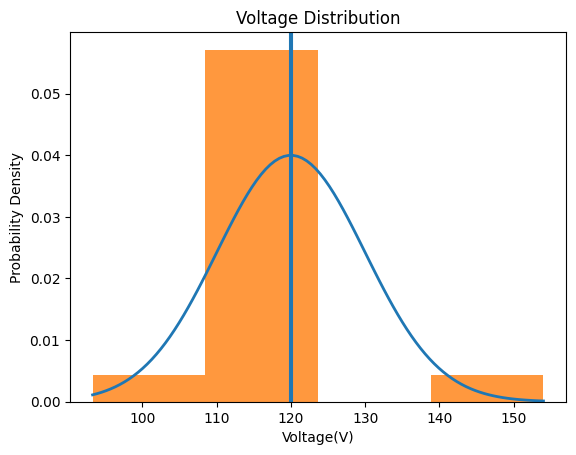

In [16]:
# voltage distribution
mean = df['Voltage'].mean()
std = df['Voltage'].std(ddof=1)

# x-axis
x_min = df['Voltage'].min()
x_max = df['Voltage'].max()

# normal distribution plot
x = np.linspace(x_min,x_max,100)
p = stats.norm.pdf(x,mean,std)
plt.plot(x,p,linewidth=2)

# histogram
plt.hist(df['Voltage'],bins=4,density=True,alpha=0.8)
plt.title('Voltage Distribution')
plt.ylabel('Probability Density')
plt.xlabel('Voltage(V)')

# confidence interval
plt.axvline(x=ci_lower)
plt.axvline(x=ci_upper)
plt.show()